<a href="https://colab.research.google.com/github/khairililmi2468gmailcom/Game-Kita-Brick-Breaket/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis "Online Lectures" in Indonesia

In [ ]:
import pandas as pd
import numpy as np

#!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
!pip install Sastrawi

In [ ]:
tweets = pd.read_csv('clean_tweets.csv')
tweets

,id_str,username,created_at,reply_count,retweet_count,favorite_count,text_clean,text_preprocessed
0,1725817184927277279,ab_by__,Sat Nov 18 10:04:15 +0000 2023,0,0,0,“dulu oma juga pemain badminton voli tukang sm...,"['', 'oma', 'main', 'badminton', 'voli', 'tuka..."
1,1725817107265560645,Seowayy,Sat Nov 18 10:03:57 +0000 2023,0,0,0,mbti ku sekarang jadi mumet 😭🤙🏼 kapan mas wa...,"['mbti', 'ku', 'mumet', '', 'mas', 'wayar', 'n..."
2,1725817045009469584,mkyrdy,Sat Nov 18 10:03:42 +0000 2023,0,0,0,c tahanan yang terpaksa melakukan kriminal unt...,"['c', 'tahan', 'paksa', 'kriminal', 'hidup', '..."
3,1725816716897481204,sebatberlima,Sat Nov 18 10:02:24 +0000 2023,0,0,0,orang gendut olahraga ga pake baju kaya orang ...,"['orang', 'gendut', 'olahraga', 'ga', 'pake', ..."
4,1725816700019638548,ridickkulus,Sat Nov 18 10:02:20 +0000 2023,0,0,0,hujan di rumah sendirian enaknya olahraga nih ...,"['hujan', 'rumah', 'enak', 'olahraga', 'nih', ..."
...,...,...,...,...,...,...,...,...
60,1725806374498812101,mleowy,Sat Nov 18 09:21:18 +0000 2023,1,0,0,iyaaa terus karena yg jual bakso ga lewat bapa...,"['iyaaa', 'yg', 'jual', 'bakso', 'ga', 'gowes'..."
61,1725806287114416140,bastian_lh,Sat Nov 18 09:20:57 +0000 2023,0,0,0,banyak juga ya orang kita rela bayar untuk non...,"['ya', 'orang', 'rela', 'bayar', 'nonton', 'se..."
62,1725805965151440966,fauzanflaksono,Sat Nov 18 09:19:40 +0000 2023,1,0,0,lu pada tau olahraga fistball ngga sih,"['lu', 'tau', 'olahraga', 'fistball', 'ngga', ..."
63,1725805769789210736,nnariswari,Sat Nov 18 09:18:54 +0000 2023,1,0,0,bnr bnr ya seminggu ga olahraga samsek,"['bnr', 'bnr', 'ya', 'minggu', 'ga', 'olahraga..."


In [ ]:
for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = str(tweets['text_preprocessed'][i]).replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)

    tweets['text_preprocessed'][i] = list_words

tweets

<ipython-input-5-d925a78dfc48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text_preprocessed'][i] = str(tweets['text_preprocessed'][i]).replace("'", "")\
<ipython-input-5-d925a78dfc48>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text_preprocessed'][i] = list_words


,id_str,username,created_at,reply_count,retweet_count,favorite_count,text_clean,text_preprocessed
0,1725817184927277279,ab_by__,Sat Nov 18 10:04:15 +0000 2023,0,0,0,“dulu oma juga pemain badminton voli tukang sm...,"[oma, main, badminton, voli, tukang, smash, te..."
1,1725817107265560645,Seowayy,Sat Nov 18 10:03:57 +0000 2023,0,0,0,mbti ku sekarang jadi mumet 😭🤙🏼 kapan mas wa...,"[mbti, ku, mumet, mas, wayar, nikah, ak, ak, c..."
2,1725817045009469584,mkyrdy,Sat Nov 18 10:03:42 +0000 2023,0,0,0,c tahanan yang terpaksa melakukan kriminal unt...,"[c, tahan, paksa, kriminal, hidup, anak, istri..."
3,1725816716897481204,sebatberlima,Sat Nov 18 10:02:24 +0000 2023,0,0,0,orang gendut olahraga ga pake baju kaya orang ...,"[orang, gendut, olahraga, ga, pake, baju, kaya..."
4,1725816700019638548,ridickkulus,Sat Nov 18 10:02:20 +0000 2023,0,0,0,hujan di rumah sendirian enaknya olahraga nih ...,"[hujan, rumah, enak, olahraga, nih, sampe, rea..."
...,...,...,...,...,...,...,...,...
60,1725806374498812101,mleowy,Sat Nov 18 09:21:18 +0000 2023,1,0,0,iyaaa terus karena yg jual bakso ga lewat bapa...,"[iyaaa, yg, jual, bakso, ga, gowes, olahraga]"
61,1725806287114416140,bastian_lh,Sat Nov 18 09:20:57 +0000 2023,0,0,0,banyak juga ya orang kita rela bayar untuk non...,"[ya, orang, rela, bayar, nonton, seleb, main, ..."
62,1725805965151440966,fauzanflaksono,Sat Nov 18 09:19:40 +0000 2023,1,0,0,lu pada tau olahraga fistball ngga sih,"[lu, tau, olahraga, fistball, ngga, sih]"
63,1725805769789210736,nnariswari,Sat Nov 18 09:18:54 +0000 2023,1,0,0,bnr bnr ya seminggu ga olahraga samsek,"[bnr, bnr, ya, minggu, ga, olahraga, samsek]"


### Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets

results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file
# tweets.to_csv(r'25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

negative    31
positive    23
neutral     11
Name: polarity, dtype: int64


,id_str,username,created_at,reply_count,retweet_count,favorite_count,text_clean,text_preprocessed,polarity_score,polarity
0,1725817184927277279,ab_by__,Sat Nov 18 10:04:15 +0000 2023,0,0,0,“dulu oma juga pemain badminton voli tukang sm...,"[oma, main, badminton, voli, tukang, smash, te...",4,positive
1,1725817107265560645,Seowayy,Sat Nov 18 10:03:57 +0000 2023,0,0,0,mbti ku sekarang jadi mumet 😭🤙🏼 kapan mas wa...,"[mbti, ku, mumet, mas, wayar, nikah, ak, ak, c...",-15,negative
2,1725817045009469584,mkyrdy,Sat Nov 18 10:03:42 +0000 2023,0,0,0,c tahanan yang terpaksa melakukan kriminal unt...,"[c, tahan, paksa, kriminal, hidup, anak, istri...",-6,negative
3,1725816716897481204,sebatberlima,Sat Nov 18 10:02:24 +0000 2023,0,0,0,orang gendut olahraga ga pake baju kaya orang ...,"[orang, gendut, olahraga, ga, pake, baju, kaya...",-1,negative
4,1725816700019638548,ridickkulus,Sat Nov 18 10:02:20 +0000 2023,0,0,0,hujan di rumah sendirian enaknya olahraga nih ...,"[hujan, rumah, enak, olahraga, nih, sampe, rea...",3,positive
...,...,...,...,...,...,...,...,...,...,...
60,1725806374498812101,mleowy,Sat Nov 18 09:21:18 +0000 2023,1,0,0,iyaaa terus karena yg jual bakso ga lewat bapa...,"[iyaaa, yg, jual, bakso, ga, gowes, olahraga]",1,positive
61,1725806287114416140,bastian_lh,Sat Nov 18 09:20:57 +0000 2023,0,0,0,banyak juga ya orang kita rela bayar untuk non...,"[ya, orang, rela, bayar, nonton, seleb, main, ...",4,positive
62,1725805965151440966,fauzanflaksono,Sat Nov 18 09:19:40 +0000 2023,1,0,0,lu pada tau olahraga fistball ngga sih,"[lu, tau, olahraga, fistball, ngga, sih]",-6,negative
63,1725805769789210736,nnariswari,Sat Nov 18 09:18:54 +0000 2023,1,0,0,bnr bnr ya seminggu ga olahraga samsek,"[bnr, bnr, ya, minggu, ga, olahraga, samsek]",4,positive


### Analysis and Visualization

### Comparasion Sentiment Polarity on Tweets Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

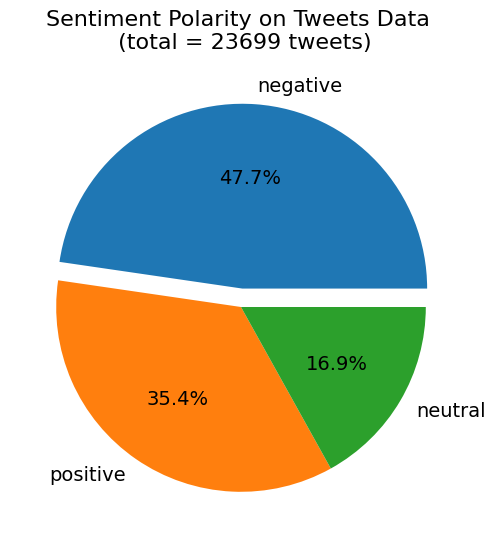

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)

plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,kan tujuan cpns mau jadi pns kak bukan jadi ani tentunya harus formal kak coba kakak lihat menteri atau pns paling mudah guru deh emg mereka pernah pake sepatu warna warni saat selain hari olahraga dan selain jam kerja,12,positive
2,jadi inget tweet soal olahraga kaya basket ini “akses” nya agak sulit dijangkau oleh masyarakat “kurang mampu” atau “kelas ekonomi kebawah” sehingga menghasilkan penggemar yang memiliki kualitas sdm lebih tinggi daripada sepakbola,11,positive
3,ini nder perpaduan floral dan fruity jadi fresh feminim dan elegan ini andalanku buat olahraga amp kegiatan outdoor karna kalo keringetan wanginya ga eneg parfum ini juga tahan lama banget dari pagi sampe sore harganya cuma k,10,positive
4,🫶 setelah thn lebih eps terakhir rilis akhirnya ada hilal jdi ep yg dikonfirmasi langsung sm jeno🥳🥳 wohooo jd gasabar kira konten selanjutnya bakal olahraga apa yaa menurut kalian apa guys,10,positive
5,ini kalian pakai baju training sudah siap olahraga ya,6,positive
6,iya numpang sarapan pagi aja ke saparuanya teh bukan olahraga kalo gt mah😃 siap nemenin lah ☺️,5,positive
7,deserved soalnya ini tinju namanya jg olahraga ya ngejar poin dong bukan ngejar asal bonyok jadi emang harus lebih taktis kl mau menang ga bisa cuma ngandalin power,5,positive
8,“dulu oma juga pemain badminton voli tukang smash tenes pingpong skrg ngana suka olahraga sm deng oma” sebangga itu oma seneng liat cucunya berolahraga 😭 krn tiap kali pamit mau badmintonmancal crita hal yg sama,4,positive
9,banyak juga ya orang kita rela bayar untuk nonton seleb main turnamen olahraga,4,positive
10,bnr bnr ya seminggu ga olahraga samsek,4,positive


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,rahman iya tapi kan saya udah pernah jadi anak pernah di posisi anak gaenak banget digituin andaikata dulu saya dikasih tau dengan gamblang bahayanya keseringan nongkrong pergaulan bebas kebanyakan makan kurang olahraga dan kemiskinan tentu saya akan jadi pribadi yg lebih siap,-29,negative
2,lebih baik mencari tau dulu tentang olahraga tinju bang biar gak mengeluarkan asumsi aneh😅,-20,negative
3,oh iya selain itu kamu juga harus perhatiin pola hidup kamu kamu sering olahraga ga berat badan kamu berlebih ga pola makan kamu sehat ga kamu lagi puber ga itu ngaruh bgt sama badan kita termasuk bau alami dari tubuh keringat itu ga bau yg bikin bau itu bakteri—,-17,negative
4,lu yang nanya lu yang minta opini jujur lu yang marah hadah kalau lu ngerasa insecure yaudah kalau lu emg ngerasa gendut masih bisa diperbaiki apa yg lu mau kecuali maaf kalau lu cacat baru tuh lu harus terima ini mah masih bisa lu atasin dgn dietolahraga,-16,negative
5,mbti ku sekarang jadi mumet 😭🤙🏼 kapan mas wayar menikahi ak ak capek tiap hari panik sampai mual dan muntah kalau dinikahi mas wayar kerjaanku olahraga bikin konten makan sehat sama mas wayar abis itu meeting soalnya kita mau launching parfum baru malamnya cuddle 😭😭,-15,negative
6,leher pundak sampe kaki sebelah kanan ngilu udah ga olahraga hari mampus,-14,negative
7,kalau sudah kurus kering ngapain lagi lari olahraga manding kau makan yang banyak terus bobo cantik kalau udah gendut baru yee,-13,negative
8,“jangan males buat olahraga biar ga penyakitan kek skrg belajar bersosialisasi ga selamanya sendiri itu indah rambut tolong di jaga lu kan bakal lulus di unpad ambil pilihan itu jangan malah ambil pilihan langsung kerja”,-12,negative
9,ide chara bgt sih fujo anak tim olahraga term depan bikin anak begini apa halu halu sendiri,-10,negative
10,aku yg males olahraga males skincare an mau ngumpet aja dalem ember 🙃,-9,negative


### Word Cloud

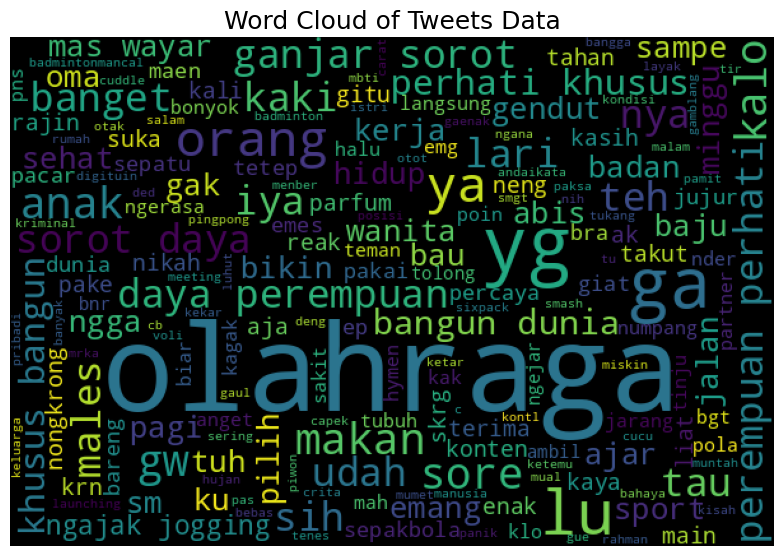

In [ ]:
# Visualize word cloud
from wordcloud import WordCloud

list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(
    width=600, height=400, background_color='black',
    min_font_size=10
).generate(list_words)

fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
plt.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

### Positive and Negative Word Cloud

In [ ]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]

        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)

    return positive_words, negative_words

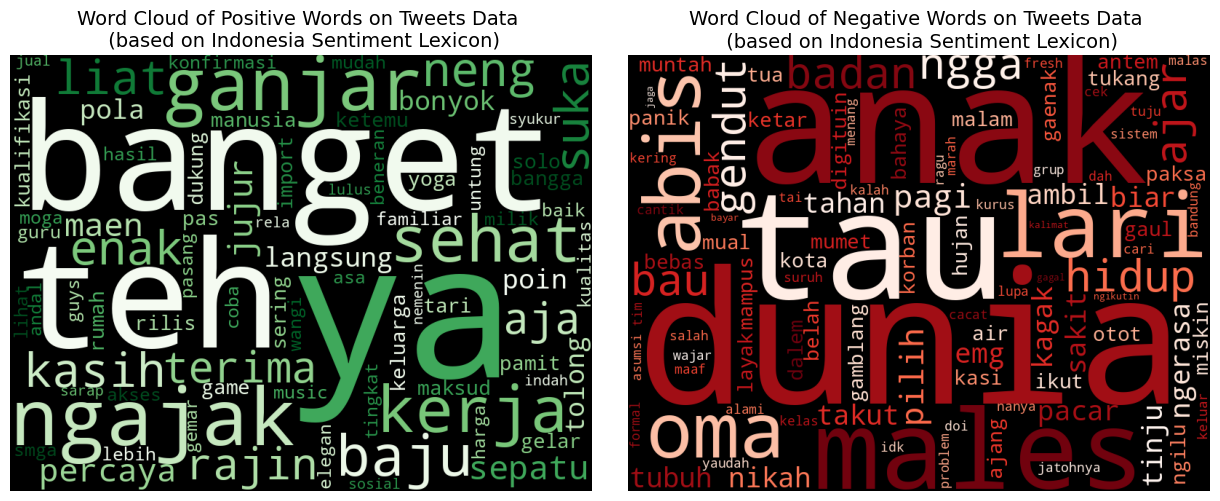

In [ ]:
# Visualize positive and negative word cloud

sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()


### Counts of Tweets Created based on Hours

In [ ]:
import seaborn as sns
import datetime as dt
sns.set(style='whitegrid')

tweets_created = []
# tweets_created = pd.to_datetime(tweets['created_at'].str.split(' ', expand=True)[1], format='%H:%M:%S')
tweets_created = pd.to_datetime(tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y', errors='coerce')

tweets_created = tweets_created.dt.round('T')
tweets_created = tweets_created.dt.time

tweets_created

0     10:04:00
1     10:04:00
2     10:04:00
3     10:02:00
4     10:02:00
        ...   
60    09:21:00
61    09:21:00
62    09:20:00
63    09:19:00
64    09:19:00
Name: created_at, Length: 65, dtype: object

In [ ]:
tweets_created = tweets_created.value_counts().sort_index().reset_index()
tweets_created

,index,created_at
0,09:19:00,2
1,09:20:00,1
2,09:21:00,2
3,09:23:00,2
4,09:24:00,1
5,09:25:00,1
6,09:26:00,3
7,09:27:00,2
8,09:28:00,2
9,09:29:00,1


In [ ]:
tweets_created.rename(columns={'index': 'created_at', 'created_at':'count'}, inplace=True)

tweets_created['created_at'] = tweets_created['created_at'].astype(str)
tweets_created

,created_at,count
0,09:19:00,2
1,09:20:00,1
2,09:21:00,2
3,09:23:00,2
4,09:24:00,1
5,09:25:00,1
6,09:26:00,3
7,09:27:00,2
8,09:28:00,2
9,09:29:00,1


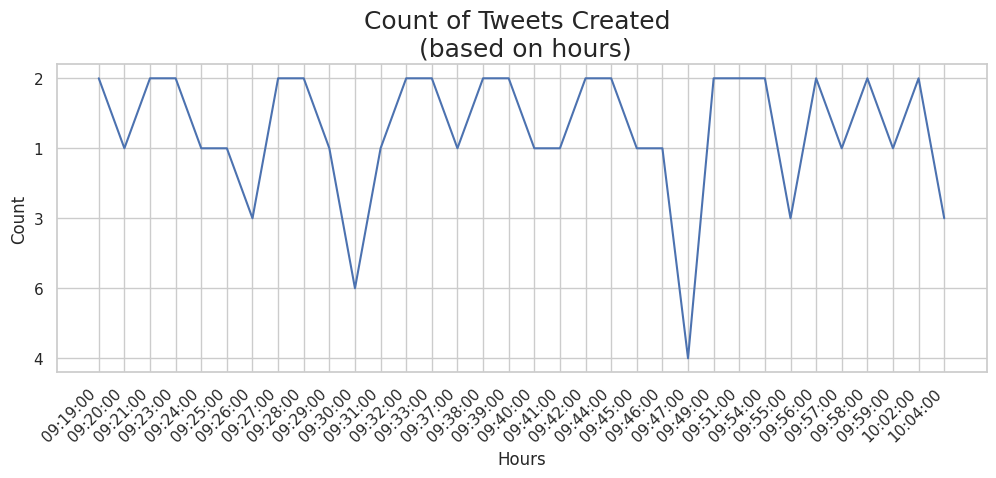

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for Seaborn
sns.set(style='whitegrid')

# Your data
x_values = tweets_created['created_at']
y_values = tweets_created['count']

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(ax=ax, x=x_values, y=y_values)

ax.set_title('Count of Tweets Created \n (based on hours)', fontsize=18)
ax.set_xlabel('Hours')

ax.set_xticks(range(len(x_values)))
ax.set_xticklabels(x_values, rotation=45, ha="right")

ax.set_ylabel('Count')
plt.show()
